<a href="https://colab.research.google.com/github/farisahmed123/Student-Data-Base-Program/blob/main/FARIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
train_ds = image_dataset_from_directory(
    directory='/content/dog-vs-cat/animals',  # Path to dataset
    labels='inferred',  # Automatically infer labels (dog and cat)
    label_mode='binary',  # Binary classification (dog vs cat)
    image_size=(256, 256),  # Resize images to 180x180
    batch_size=32  # Number of images per batch
)
val_ds = image_dataset_from_directory(
    directory='/content/dog-vs-cat/animals',  # Path to dataset
    labels='inferred',  # Automatically infer labels (dog and cat)
    label_mode='binary',  # Binary classification (dog vs cat)
    image_size=(256, 256),  # Resize images to 180x180
    batch_size=32  # Number of images per batch
)


Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farisnizamani","key":"bd7862a0124c866a1701ca9d018df3ca"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d anthonytherrien/dog-vs-cat



Dataset URL: https://www.kaggle.com/datasets/anthonytherrien/dog-vs-cat
License(s): CC-BY-SA-4.0


In [ ]:
!unzip dog-vs-cat.zip -d dog-vs-cat


Archive:  dog-vs-cat.zip
  inflating: dog-vs-cat/animals/cat/00000-4122619873.png  
  inflating: dog-vs-cat/animals/cat/00001-4122619874.png  
  inflating: dog-vs-cat/animals/cat/00002-4122619875.png  
  inflating: dog-vs-cat/animals/cat/00003-4122619876.png  
  inflating: dog-vs-cat/animals/cat/00004-4122619877.png  
  inflating: dog-vs-cat/animals/cat/00005-4122619878.png  
  inflating: dog-vs-cat/animals/cat/00006-4122619879.png  
  inflating: dog-vs-cat/animals/cat/00007-4122619880.png  
  inflating: dog-vs-cat/animals/cat/00008-4122619881.png  
  inflating: dog-vs-cat/animals/cat/00009-4122619882.png  
  inflating: dog-vs-cat/animals/cat/00010-4122619883.png  
  inflating: dog-vs-cat/animals/cat/00011-4122619884.png  
  inflating: dog-vs-cat/animals/cat/00012-4122619885.png  
  inflating: dog-vs-cat/animals/cat/00013-4122619886.png  
  inflating: dog-vs-cat/animals/cat/00014-4122619887.png  
  inflating: dog-vs-cat/animals/cat/00015-4122619888.png  
  inflating: dog-vs-cat/animals

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.metrics import Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [54]:
batch_size = 32
image_size = (256, 256)
epochs = 10

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split 80% train, 20% val
)

# Train Generator
train_generator = train_datagen.flow_from_directory(
    '/content/dog-vs-cat/animals',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

# Validation Generator (no additional augmentation, just rescaling)
val_generator = train_datagen.flow_from_directory(
    '/content/dog-vs-cat/animals',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=True
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D

# Load VGG16 model pre-trained on ImageNet, excluding the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze the VGG16 layers so they won't be trained

# Build the model
model = Sequential([
    base_model,  # Add VGG16 as the base model
    GlobalAveragePooling2D(),  # Pooling layer to reduce dimensionality
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Dense layer with L2 regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [90]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']  # corrected spelling
)
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,747,585 (56.26 MB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    callbacks=[early_stopping]
)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6069 - loss: 1.6502 - val_accuracy: 0.9000 - val_loss: 1.1407
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9522 - loss: 1.0045 - val_accuracy: 0.9850 - val_loss: 0.7181
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9734 - loss: 0.6546 - val_accuracy: 0.9500 - val_loss: 0.5149
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9810 - loss: 0.4669 - val_accuracy: 0.9700 - val_loss: 0.4089
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9739 - loss: 0.3757 - val_accuracy: 0.9700 - val_loss: 0.3563
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9784 - loss: 0.3174 - val_accuracy: 0.9850 - val_loss: 0.3122
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9893 - loss: 0.2844 - val_accuracy: 0.9800 - val_loss: 0.2813
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9867 - loss: 0.2620 - val_accuracy: 0.9750 - val_loss:

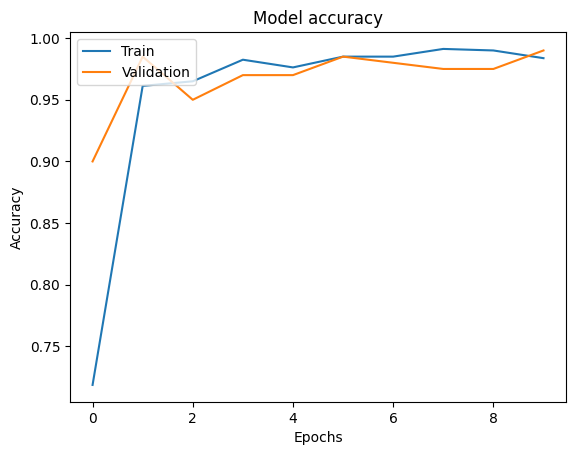

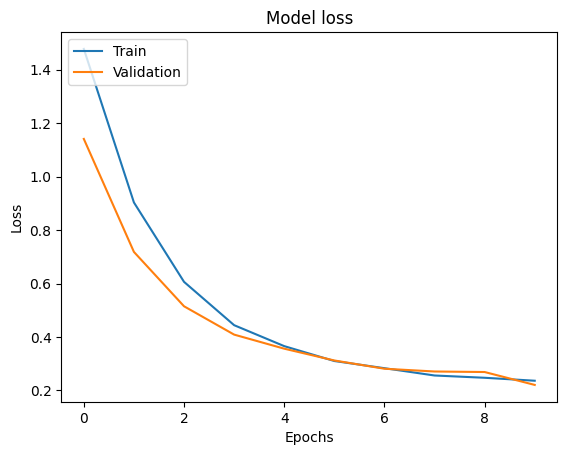

In [93]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [103]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load image and resize to match training input
img = image.load_img("dog.jpg", target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Rescale

# Add batch dimension
# img_array = np.expand_dims(img_array, axis=0)



In [104]:
prediction = model.predict(img_array)
print(prediction[0][0])
if prediction > 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
0.89238316
Prediction: Dog


In [ ]:
os.path.exists(r"C:\Users\Faris Ahmed\Downloads\aa.jpg")


False

In [102]:
from google.colab import files
uploaded = files.upload()


Saving dog.jpg to dog.jpg


In [ ]:
import os
print("Exists?", os.path.exists("aa.jpg"))


Exists? True
